<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Week 3 Lecture 2</div>
<div style="text-align: right">Dino Konstantopoulos, 15 September 2019</div>

Let's implement a *complete* **Genetic Algorithm** (GA) to do data science: *figure out the curve so that we can throw away the data*.

Let's assume a polynomial curve. There is a theorem in linear algebra that says that you can fit a polynomial of degree $n$ to go through any number of $n$ datapoints.

The problem with polyonmial curves is that they wiggle a lot (well, less than $Fourier$ series, but that is another chapter), so an overfit to the training points may produce wild wiggles and thus wrong results on test data.

For example, this is $2.2{x}^{1}-81.7{x}^{3}+1576.6{x}^{5}-12865{x}^{7}+53760.4{x}^{9}-128928.6{x}^{11}+185521.7{x}^{13}-158630{x}^{15}+74398.9{x}^{17}-14754.5{x}^{19}$:

<br />
<center>
    <img src="ipynb.images/polynomial.png" width=400 />
</center>

In [51]:
"""
The y=target is to find the w's in this equation:
    y = w3x^3+w2x^2+w1x^1+w0x^0
    such that the curve above passes through 4 points (x1, y1), (x2, y2), (x3, y3), (x4, y4)
    What are the best values for the 4 weights w0 to w3?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Inputs of the equation (predetermined)
training_data = [(-4,-200), (-2,-1), (2,4), (4, 200)]

# Number of the weights we are looking to optimize.
num_weights = len(training_data)

"""
Genetic algorithm hyperparameters:
    Mating pool size
    Population size
    Mutation rate
"""
pop = 1000
num_chromosomes = num_weights
chromosome_size = (pop, num_chromosomes)
mutation_rate = 0.1

Let's have fun with our genetic algorithm.

Planet **Berk** is populated by **berkians** with 4 chromosomes $(w_0, w_1, w_2, w_3)$. That is their *genotype*.

<br />
<center>
    <img src="ipynb.images/berkians.jpg" width=600 />
</center>

Their *phenotype* is the value of $y = w_3x^3+w_2x^2+w_1x^1+w_0x^0$

Berkians are just a much simpler version of humans. *Your* genotype is your DNA. *Your* phenotype is how pretty you look, how strong you are, how smart, how psychologically stable, etc.

Berkians *also* have a notion of *prettyness*, or ***fitness***: Given 4 points $(x, y)$ determined by the berkian god, it is the total value of the absolute value of their phenotype minus $y$, for each $x$: $$\sum_{i=0, 4} |y_ i - (w_3x_i^3+w_2x_i^2+w_1x_i^1+w_0x_i^0) |$$ 

In other words, prettyness/fitness for a berkian is that their chromosome weights are as close as possible to the coefficients of our desired polynomial curve: the one that goes through our predetermined 4 points.

<br />
<center>
    <img src="ipynb.images/mirror.jpg" width=600 />
</center>

Berkians have sex in the following way: The prettiest berkians select the prettiest berkians and they have sex and a new berkian is born that shares the first half of the chromosomes of the first berkian and the second half of the chromosomes of the second berkian.

Berkians (like us) live under a sun that has solar flares that sends radioactivity over to planet Berk, which produces random mutations in the berkian chromosome. Random mutations replace one of the chromosomes, picked randomly, in the berkian genotype with a random number.

Berkians, like americans, want to produce a **Marilyn Monroe** for their version of Hollywood to help us with our data science. So they want to have lots of sex and sit at the beach for long tanning sessions in order to produce the prettiest berkian under their sun, as determined by their berkian god.

<br />
<center>
    <img src="ipynb.images/hollywood.jpg" width=600 />
</center>

How many generations will it take for berkians to get close to their **Marilyn Monroe** dream, and solve our data science? 

There are *hyperparamater* in the berkian universe (leading to many parallel berkian universes, for each value of the hyperparameters), kind of like in Star Trek parallel universes. It is how often random mutations happen under the berkian sun, the size of the berkian population, the number of berkian chromosomes. For the simplest possible parallel universe, we will assume one random mutation per generation on a random index of the berkian genotype.

In [76]:
from random import choices
import random

def and_god_created_berkians(how_many):
    berkians = []
    for berk in range(how_many):
        berk = []
        for i in range(4):
            chromosome = random.uniform(-5., 5.)
            berk.append(chromosome)
        berkians.append(berk)
    return berkians
    
def phenotype(genes, x):
    y = genes[3] * x**3 + genes[2] * x**2 + genes[1] * x**1 + genes[0] * x**0
    return y

def berk_fitness(list_of_points, berk):
    # Calculating the fitness value of a berkian, best possible fitness is infinity
    fitness = 0
    for x,y in list_of_points:
        fitness += 1. / (y - phenotype(berk, x))**2
    return fitness

def planet_berk_fitness(list_of_points, berkians):
    fitnesses = []
    for berk in berkians:
        fitnesses.append(berk_fitness(list_of_points, berk))
    return fitnesses

def planet_berk_average_fitness(list_of_points, berkians):
    fitness = 0
    for berk in berkians:
        fitness += berk_fitness(list_of_points, berk)
    return fitness / len(berkians)

def planet_berk_top_fittest(list_of_points, berkians, how_many):
    # Returning the top fittest berkians
    fitness = []
    for berk in berkians:
        fitness.append(berk_fitness(list_of_points, berk))
    
    top_fittest = []
    for i in range(int(how_many)):
        fittest = 0
        for y in fitness:
            if y > fittest:
                fittest = i
        
        top_fittest.append(berkians[i])
        fitness[i] = 0
        
    return top_fittest

def select_berk_mating_pool_2(list_of_points, berkians, percent):
    # Selecting the best berkians in the current generation as parents 
    # for producing the offspring in the next generation. Pick
    # the top percent%
    return planet_berk_top_fittest(list_of_points, berkians, len(berkians) * percent)

def crossover2(parents):
    offspring = []
    
    # The point at which crossover takes place between two parent berkians. Usually, it is at the center.
    crossover_point = 2

    for i in range(len(parents)):
        couple = choices(range(len(parents)), k=2)
        baby_berk = [0,0,0,0]
        
        # Index of the first parent to mate.
        parent1_idx = couple[0]
        
        # Index of the second parent to mate.
        parent2_idx = couple[1]
        
        # The new offspring will have its first half of its genes taken from the first parent.
        baby_berk[0:crossover_point] = parents[parent1_idx][0:crossover_point]
        
        # The new offspring will have its second half of its genes taken from the second parent.
        baby_berk[crossover_point:] = parents[parent2_idx][crossover_point:]
        
        # add baby_berk to the offspring generation
        offspring.append(baby_berk)
        
    return offspring

def mutation2(parents, num_mutations=1):
    for parent in parents:
        for mutation in range(num_mutations):
            mutation_location = choices(range(4), k=1)[0]
            mutation = random.uniform(-1., 1.)
            parent[mutation_location] += mutation
            
    return parents

## Parent selection

Parent Selection is the process of selecting berkian parents which mate and recombine to create berkian offspring for the next generation. Parent selection is very crucial to the convergence rate of the GA as good parents drive individuals to a better and fitter solutions.

However, care should be taken to prevent one extremely fit solution from taking over the entire population in a few generations, as this leads to the solutions being close to one another in the solution space thereby leading to a loss of ***diversity***. Maintaining good diversity in the population is extremely crucial for the success of a GA. This taking up of the entire population by one extremely fit solution is known as ***premature convergence** and is an undesirable condition in a GA.

***Fitness Proportionate Selection*** is one of the most popular ways of parent selection. In this every berkian can become a parent with a probability which is proportional to its fitness. Therefore, fitter berkians have a higher chance of mating and propagating their features to the next generation. Therefore, such a selection strategy applies a selection pressure to the more fit individuals in the population, evolving better individuals over time.

Consider a circular wheel. The wheel is divided into $n$ pies, where $n$ is the number of berkians on planet Berk. Each berkian gets a portion of the circle which is proportional to its fitness value.

In a roulette wheel selection, the circular wheel is divided as described before. A fixed point is chosen on the wheel circumference as shown and the wheel is rotated. The region of the wheel which comes in front of the fixed point is chosen as the parent. For the second parent, the same process is repeated.

<br />
<center>
    <img src="ipynb.images/roulette-wheel.png" width=600 />
</center>

It is clear that a fitter berkian has a greater pie on the wheel and therefore a greater chance of landing in front of the fixed point when the wheel is rotated. Therefore, the probability of choosing a berkian depends directly on its fitness.

Implementation wise, we use the following steps −

Calculate $F$ = the sum of all fitnesses, the fitness of the berkian population on planet berk.

Generate a random number $r$ between $0$ and $F$.

Starting from the top of the berkian population, keep adding the finesses to the partial sum $p$.

The individual for which $p$ exceeds $r$ is the chosen individual.

Let's select `num` berkians according to fitness proportionate roulette wheel selection. Those are the berkians that will have sex between each other. We'll mate the first two, then the next two, etc. Let's make sure we always select `num` as an even number.

In [77]:
import numpy as np
def roulette_select(list_of_points, population, num):
    """ Roulette selection, implemented according to:
        <http://stackoverflow.com/questions/177271/roulette
        -selection-in-genetic-algorithms/177278#177278>
    """
    fitnesses = planet_berk_fitness(list_of_points, population)
    total_fitness = float(sum(fitnesses))
    rel_fitness = [f/total_fitness for f in fitnesses]
    
    # Generate probability intervals for each individual
    probs = [sum(rel_fitness[:i+1]) for i in range(len(rel_fitness))]
    
    # Draw new population
    new_population = []
    for n in range(num):
        r = np.random.rand()
        for (i, individual) in enumerate(population):
            if r <= probs[i]:
                new_population.append(individual)
                break
                
    return new_population

In [78]:
#Creating the initial berkian population.
#new_population = numpy.random.uniform(low=-10.0, high=10.0, size=chromosome_size)
#print(new_population[0:10, :])

"""
berkians[0] = [2.4,  0.7, 8, -2]
berkians[1] = [-0.4, 2.7, 5, -1]
berkians[2] = [-1,   2,   2, -3]
berkians[3] = [4,    7,   12, 6.1]
berkians[4] = [3.1,  4,   0,  2.4]
berkians[5] = [-2,   3,   -7, 6]
...
"""

berkians = and_god_created_berkians(1000)
berkians[0:10]

[[4.062437012334646,
  -1.5494329837413812,
  -1.1100844324975432,
  -4.586104398021064],
 [0.5609434901891364,
  -1.894869734046308,
  1.7406638770703653,
  -1.4117828589624617],
 [-2.869110930497608,
  -3.700850362058765,
  -3.57953545269708,
  4.627462558843062],
 [-1.0438769315575023,
  2.048138430613613,
  -0.29899101462342514,
  -4.346524800555258],
 [-0.8538454022896875,
  1.0284592337951217,
  -3.1307892176201424,
  -0.09446669450090539],
 [-4.798870953108311,
  4.441572074103487,
  -3.7624020513856946,
  0.9125813567699925],
 [4.531994136135468,
  4.450357158185156,
  0.09969837752788724,
  -4.71325269394166],
 [0.26645850076106203,
  0.5294020733418137,
  -2.0830455535564827,
  1.1742510177056609],
 [-3.432137560188405,
  -3.871363224417049,
  2.9914618193135354,
  -1.2883550226561793],
 [-0.10857359076676154,
  -2.817511414808671,
  -2.732991497776033,
  -0.9457813030866884]]

In [79]:
# Return the index of that solution corresponding to the best current fitness
berk_champ_0 = planet_berk_top_fittest(training_data, berkians, 1)[0]

num_generations = 1000
for generation in range(num_generations):
    print("Generation: " + str(generation) + ", fitness: " + str(planet_berk_average_fitness(training_data, berkians)))
    
    # Selecting the best parents in the population for mating
    #fittest_berkians = select_berk_mating_pool_2(training_data, berkians, .2)
    fittest_berkians = roulette_select(training_data, berkians, 200)

    # Sex: Generating next generation using crossover
    baby_berks = crossover2(fittest_berkians)
    
    # Mix new generation with old generation, preserving parents
    for i in range(len(baby_berks)):
        for j in range(int(len(berkians) * .2)):
            if (berkians[j] not in fittest_berkians):
                berkians[j] = baby_berks[i]
                break

    # Mutation: Adding some variations to next generation using mutation
    berkians = mutation2(berkians)


Generation: 0, fitness: 286.41482088754543
Generation: 1, fitness: 604.6380241109001
Generation: 2, fitness: 154.20969777154977
Generation: 3, fitness: 104.7653103174939
Generation: 4, fitness: 22.119307106897203
Generation: 5, fitness: 84.34084930374708
Generation: 6, fitness: 6537.128817299236
Generation: 7, fitness: 126.68948141066652
Generation: 8, fitness: 1963.6565177128455
Generation: 9, fitness: 137.82691494152206
Generation: 10, fitness: 43.074865546700146
Generation: 11, fitness: 13.498759147565679
Generation: 12, fitness: 70.27364556595657
Generation: 13, fitness: 7.658452762857116
Generation: 14, fitness: 126.33297474387065
Generation: 15, fitness: 10.579315995393626
Generation: 16, fitness: 69.98794610006868
Generation: 17, fitness: 5.8245518375774425
Generation: 18, fitness: 19.918896700210613
Generation: 19, fitness: 206.5450564813431
Generation: 20, fitness: 1485.9076680718936
Generation: 21, fitness: 11.953210095698276
Generation: 22, fitness: 536.5586463708681
Generat

Generation: 188, fitness: 30.391475589838112
Generation: 189, fitness: 87.13951456918625
Generation: 190, fitness: 21.713287275567186
Generation: 191, fitness: 25.534761813978708
Generation: 192, fitness: 30.312041865471766
Generation: 193, fitness: 1820.9533854705608
Generation: 194, fitness: 16793.374049636433
Generation: 195, fitness: 392.50460798288026
Generation: 196, fitness: 40.10950245843492
Generation: 197, fitness: 2958.1239471317945
Generation: 198, fitness: 18.751865577784624
Generation: 199, fitness: 30.170563944655623
Generation: 200, fitness: 4.7395385927567
Generation: 201, fitness: 42.82574017401311
Generation: 202, fitness: 8.981475890569776
Generation: 203, fitness: 6.302474715921974
Generation: 204, fitness: 50.01579939519608
Generation: 205, fitness: 12.656350159695238
Generation: 206, fitness: 40.869545857808326
Generation: 207, fitness: 23.08348568112076
Generation: 208, fitness: 9.035927638746147
Generation: 209, fitness: 2.621192264174532
Generation: 210, fitne

Generation: 373, fitness: 53.40044835230164
Generation: 374, fitness: 14.521783339927829
Generation: 375, fitness: 18.99597952646646
Generation: 376, fitness: 7.04929491568744
Generation: 377, fitness: 187303.38575572477
Generation: 378, fitness: 15.614615176120871
Generation: 379, fitness: 119.98847784438847
Generation: 380, fitness: 2.6428954657353416
Generation: 381, fitness: 4387.566855617687
Generation: 382, fitness: 7049.7991244650675
Generation: 383, fitness: 741765.3006439223
Generation: 384, fitness: 5622.320574830001
Generation: 385, fitness: 19.970665157620687
Generation: 386, fitness: 41.4746495264692
Generation: 387, fitness: 34.52340453111845
Generation: 388, fitness: 3.382401718443237
Generation: 389, fitness: 42.041731407695465
Generation: 390, fitness: 24.826036910852036
Generation: 391, fitness: 33.894808093268736
Generation: 392, fitness: 9.6702954372266
Generation: 393, fitness: 6.772846187861115
Generation: 394, fitness: 1.421569935939218
Generation: 395, fitness: 

Generation: 560, fitness: 28.582852615937604
Generation: 561, fitness: 155.0220606526107
Generation: 562, fitness: 7.564931685523898
Generation: 563, fitness: 19.111811070558296
Generation: 564, fitness: 1.5252961343071252
Generation: 565, fitness: 11.012007552097474
Generation: 566, fitness: 2456.331755500405
Generation: 567, fitness: 4.112248055487519
Generation: 568, fitness: 114.81723791349916
Generation: 569, fitness: 4.879249877896603
Generation: 570, fitness: 26.8072900834451
Generation: 571, fitness: 1.9233058817982431
Generation: 572, fitness: 136.76167551960222
Generation: 573, fitness: 461.04581330781923
Generation: 574, fitness: 60.56835162440115
Generation: 575, fitness: 270.55195611551954
Generation: 576, fitness: 9.319093585931897
Generation: 577, fitness: 29.11502108168195
Generation: 578, fitness: 143.3905658894143
Generation: 579, fitness: 20.605604540699694
Generation: 580, fitness: 50.83053484853095
Generation: 581, fitness: 18017.526703099524
Generation: 582, fitne

Generation: 746, fitness: 22.520941955143932
Generation: 747, fitness: 4.392439500765678
Generation: 748, fitness: 5.855479000150376
Generation: 749, fitness: 34.81842605903003
Generation: 750, fitness: 4.1174156246719935
Generation: 751, fitness: 23.315903892222103
Generation: 752, fitness: 6.705754105455011
Generation: 753, fitness: 475.3575586091853
Generation: 754, fitness: 129.23008195372955
Generation: 755, fitness: 4.511472207105182
Generation: 756, fitness: 2.9666333271663015
Generation: 757, fitness: 10.384109210583638
Generation: 758, fitness: 44.47563292006973
Generation: 759, fitness: 47.30805799276564
Generation: 760, fitness: 2923.134152010954
Generation: 761, fitness: 262.3533560908954
Generation: 762, fitness: 21.869818954748645
Generation: 763, fitness: 33.61064004535643
Generation: 764, fitness: 44.71854779707878
Generation: 765, fitness: 891.2098517986159
Generation: 766, fitness: 32.45658464804556
Generation: 767, fitness: 682.9967147208752
Generation: 768, fitness:

Generation: 932, fitness: 39.065771578965716
Generation: 933, fitness: 96870.08613418856
Generation: 934, fitness: 7.146761166707406
Generation: 935, fitness: 31.5009640094083
Generation: 936, fitness: 2.459785177300256
Generation: 937, fitness: 6.012821511880862
Generation: 938, fitness: 2.2802690270282864
Generation: 939, fitness: 5.458475719698705
Generation: 940, fitness: 4.165872237225006
Generation: 941, fitness: 14.83808547076313
Generation: 942, fitness: 115.231834523087
Generation: 943, fitness: 239.89223573883666
Generation: 944, fitness: 22.826012524673455
Generation: 945, fitness: 40.923022517146926
Generation: 946, fitness: 80.9651682609195
Generation: 947, fitness: 1796.5122778775515
Generation: 948, fitness: 1022.5877592968455
Generation: 949, fitness: 18.04837439882188
Generation: 950, fitness: 27.1537143791407
Generation: 951, fitness: 116486.73594792663
Generation: 952, fitness: 6.8351556023239795
Generation: 953, fitness: 187.65339253000053
Generation: 954, fitness: 

Best solution :  [-1.2665351467269736, 20.485357296078327, 3.886932877032212, -6.2135973420691695]
Best solution fitness :  0.42168743484578997
NumPy's polynomial fit:
       3         2
4.062 x - 0.125 x - 15 x + 2


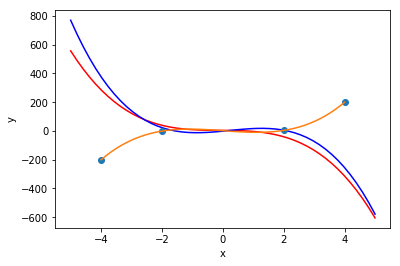

In [80]:
# Return the index of that solution corresponding to the best fitness.
berk_champ = planet_berk_top_fittest(training_data, berkians, 1)[0]

print("Best solution : ", berk_champ)
print("Best solution fitness : ", berk_fitness(training_data, berk_champ))

# plot
import numpy as np
import matplotlib.pyplot
%matplotlib inline
      
x = np.linspace(-5, 5, 50)
y0 = berk_champ_0[3] * x**3 + berk_champ_0[2] * x**2 + berk_champ_0[1] * x**1 + berk_champ_0[0] * x**0
y = berk_champ[3] * x**3 + berk_champ[2] * x**2 + berk_champ[1] * x**1 + berk_champ[0] * x**0
      
matplotlib.pyplot.xlabel("x")
matplotlib.pyplot.ylabel("y")
matplotlib.pyplot.plot(x, y0, color='red')
matplotlib.pyplot.plot(x, y, color='blue')

matplotlib.pyplot.plot(training_data[0][0], training_data[0][1], 'r+')  
matplotlib.pyplot.plot(training_data[1][0], training_data[1][1], 'r+')  
matplotlib.pyplot.plot(training_data[2][0], training_data[2][1], 'r+')  
matplotlib.pyplot.plot(training_data[3][0], training_data[3][1], 'r+')  

# get x and y vectors
points = np.array(training_data)
x = points[:,0]
y = points[:,1]

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)
print("NumPy's polynomial fit:")
print (f)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
matplotlib.pyplot.plot(x,y,'o', x_new, y_new)